# Necessary Comment : jupyter notebook

## Necessary Lighbary



In [1]:
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Database Connection

In [3]:
#connection = sqlite3.connect(r"cripto.db")
connection = sqlite3.connect(r"big_data.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [4]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.665072e+12,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.650134e+12,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.645314e+12,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,5.237727e+04,94.0,0.921370,1652818260


## Name Columns

In [5]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.661659e+12,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,1.661636e+12,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,1.661720e+12,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,1.651697e+12,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,1.621049e+12,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.665072e+12,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.650134e+12,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.645314e+12,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,1.652818e+12,5.237727e+04,94.0,0.921370,1652818260


# Make a Candle plot

In [87]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]

# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

# mpf.plot(
#     df_candle.tail(100),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [6]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2022-08-28 03:48:59.999000064,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
2022-08-27 21:32:59.999000064,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2022-08-28 21:00:59.999000064,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
2022-05-04 20:44:59.999000064,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
2021-05-15 03:28:59.999000064,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06 15:55:59.999000064,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.462424e+06,1169.0,35.556670,1665071700
2022-04-16 18:31:59.999000064,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.664380e+04,64.0,0.109080,1650133860
2022-02-19 23:41:59.999000064,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.471828e+04,42.0,0.089730,1645314060


In [89]:
# from dataframe import GetDataframe
# df = GetDataframe().data_function('BTCBUSD', 1, 10000)
# df

# Super Trend

https://medium.com/codex/step-by-step-implementation-of-the-supertrend-indicator-in-python-656aa678c111

In [90]:
# df = df.iloc[:, 2:7]
# df.rename(columns={'VolumeBTC': 'volume'}, inplace=True)
# df.index = df.index.rename('datetime')
# df = df.applymap(lambda s:s.lower() if isinstance(s, str) else s)
# tsla = df
# tsla['High']

In [91]:
# def get_supertrend(high, low, close, lookback, multiplier):
#
#     # ATR
#
#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()
#
#     # H/L AVG AND BASIC UPPER & LOWER BAND
#
#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()
#
#     # FINAL UPPER BAND
#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]
#
#     # FINAL LOWER BAND
#
#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]
#
#     # SUPERTREND
#
#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]
#
#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#
#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]
#
#     # ST UPTREND/DOWNTREND
#
#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]
#
#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)
#
#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index
#
#     return st, upt, dt
#
# df['st'] = get_supertrend(df['High'], df['Low'], df['Close'], 1000, 3)

In [92]:
# # SUPERTREND CALCULATION
# def get_supertrend(high, low, close, lookback, multiplier):

#     # ATR

#     tr1 = pd.DataFrame(high - low)
#     tr2 = pd.DataFrame(abs(high - close.shift(1)))
#     tr3 = pd.DataFrame(abs(low - close.shift(1)))
#     frames = [tr1, tr2, tr3]
#     tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
#     atr = tr.ewm(lookback).mean()

#     # H/L AVG AND BASIC UPPER & LOWER BAND

#     hl_avg = (high + low) / 2
#     upper_band = (hl_avg + multiplier * atr).dropna()
#     lower_band = (hl_avg - multiplier * atr).dropna()

#     # FINAL UPPER BAND

#     final_bands = pd.DataFrame(columns = ['upper', 'lower'])
#     final_bands.iloc[:,0] = [x for x in upper_band - upper_band]
#     final_bands.iloc[:,1] = final_bands.iloc[:,0]

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i,0] = 0
#         else:
#             if (upper_band[i] < final_bands.iloc[i-1,0]) | (close[i-1] > final_bands.iloc[i-1,0]):
#                 final_bands.iloc[i,0] = upper_band[i]
#             else:
#                 final_bands.iloc[i,0] = final_bands.iloc[i-1,0]

#     # FINAL LOWER BAND

#     for i in range(len(final_bands)):
#         if i == 0:
#             final_bands.iloc[i, 1] = 0
#         else:
#             if (lower_band[i] > final_bands.iloc[i-1,1]) | (close[i-1] < final_bands.iloc[i-1,1]):
#                 final_bands.iloc[i,1] = lower_band[i]
#             else:
#                 final_bands.iloc[i,1] = final_bands.iloc[i-1,1]

#     # SUPERTREND

#     supertrend = pd.DataFrame(columns = [f'supertrend_{lookback}'])
#     supertrend.iloc[:,0] = [x for x in final_bands['upper'] - final_bands['upper']]

#     for i in range(len(supertrend)):
#         if i == 0:
#             supertrend.iloc[i, 0] = 0
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] < final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 0] and close[i] > final_bands.iloc[i, 0]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] > final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 1]
#         elif supertrend.iloc[i-1, 0] == final_bands.iloc[i-1, 1] and close[i] < final_bands.iloc[i, 1]:
#             supertrend.iloc[i, 0] = final_bands.iloc[i, 0]

#     supertrend = supertrend.set_index(upper_band.index)
#     supertrend = supertrend.dropna()[1:]

#     # ST UPTREND/DOWNTREND

#     upt = []
#     dt = []
#     close = close.iloc[len(close) - len(supertrend):]

#     for i in range(len(supertrend)):
#         if close[i] > supertrend.iloc[i, 0]:
#             upt.append(supertrend.iloc[i, 0])
#             dt.append(np.nan)
#         elif close[i] < supertrend.iloc[i, 0]:
#             upt.append(np.nan)
#             dt.append(supertrend.iloc[i, 0])
#         else:
#             upt.append(np.nan)
#             dt.append(np.nan)

#     st, upt, dt = pd.Series(supertrend.iloc[:, 0]), pd.Series(upt), pd.Series(dt)
#     upt.index, dt.index = supertrend.index, supertrend.index

#     return st, upt, dt

# tsla['st'], tsla['s_upt'], tsla['st_dt'] = get_supertrend(tsla['High'], tsla['Low'], tsla['Close'], 10, 3)
# tsla = tsla[1:]
# print(tsla.head())

# # SUPERTREND STRATEGY

# def implement_st_strategy(prices, st):
#     buy_price = []
#     sell_price = []
#     st_signal = []
#     signal = 0

#     for i in range(len(st)):
#         if st[i-1] > prices[i-1] and st[i] < prices[i]:
#             if signal != 1:
#                 buy_price.append(prices[i])
#                 sell_price.append(np.nan)
#                 signal = 1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         elif st[i-1] < prices[i-1] and st[i] > prices[i]:
#             if signal != -1:
#                 buy_price.append(np.nan)
#                 sell_price.append(prices[i])
#                 signal = -1
#                 st_signal.append(signal)
#             else:
#                 buy_price.append(np.nan)
#                 sell_price.append(np.nan)
#                 st_signal.append(0)
#         else:
#             buy_price.append(np.nan)
#             sell_price.append(np.nan)
#             st_signal.append(0)

#     return buy_price, sell_price, st_signal

# buy_price, sell_price, st_signal = implement_st_strategy(tsla['Close'], tsla['st'])

# # GENERATING STOCK POSITION
# position = []
# for i in range(len(st_signal)):
#     if st_signal[i] > 1:
#         position.append(0)
#     else:
#         position.append(1)

# for i in range(len(tsla['Close'])):
#     if st_signal[i] == 1:
#         position[i] = 1
#     elif st_signal[i] == -1:
#         position[i] = 0
#     else:
#         position[i] = position[i-1]

# close_price = tsla['Close']
# st = tsla['st']
# st_signal = pd.DataFrame(st_signal).rename(columns = {0:'st_signal'}).set_index(tsla.index)
# position = pd.DataFrame(position).rename(columns = {0:'st_position'}).set_index(tsla.index)

# frames = [close_price, st, st_signal, position]
# strategy = pd.concat(frames, join = 'inner', axis = 1)

# strategy.head()
# print(strategy[20:25])

# Make a Custom Pattern

In [7]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
                                         df['Close'])
ENGULFING
ENGULFING[ENGULFING != 0]

# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

Series([], dtype: int32)

In [94]:
# dir(talib)

In [8]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
# df = df.head(100)
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,742859,BTCBUSD,19998.23,20002.69,19995.19,19998.21,9.474930,-0.000100008850785477,1.894831e+05,441.0,6.187260,1661658480
1,742483,BTCBUSD,19997.02,19998.00,19997.00,19997.00,2.829590,-0.000100014902222614,5.658343e+04,173.0,0.973320,1661635920
2,743891,BTCBUSD,19987.76,19998.62,19985.14,19987.74,25.911260,-0.000100061237461319,5.180279e+05,642.0,17.762630,1661720400
3,576835,BTCBUSD,39858.07,39858.07,39853.57,39858.03,1.005430,-0.000100356088493179,4.007142e+04,89.0,0.707620,1651697040
4,66429,BTCBUSD,49822.29,49860.68,49803.54,49822.24,7.058411,-0.000100356687745405,3.517801e+05,238.0,3.036725,1621049280
...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,799746,BTCBUSD,20099.98,20111.00,20090.47,20100.00,72.755640,9.95025865719098e-05,1.462424e+06,1169.0,35.556670,1665071700
1035983,550782,BTCBUSD,40154.99,40165.00,40154.99,40155.03,0.414450,9.96140205759561e-05,1.664380e+04,64.0,0.109080,1650133860
1035984,470452,BTCBUSD,40089.28,40097.68,40089.28,40089.32,0.367120,9.97772970751111e-05,1.471828e+04,42.0,0.089730,1645314060
1035985,595522,BTCBUSD,30036.82,30036.85,30026.53,30036.85,1.743990,9.98774171128497e-05,5.237727e+04,94.0,0.921370,1652818260


In [9]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)
# print(data['rsi'].to_string())

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100
# df['rsisignal'] = df['rsisignal'].fillna(0)

print(df['rsisignal'].to_string())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Make Dataframe From Binance Data

## Get Result and All the candlesticks from Ta-Lib

In [11]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500
1035983,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,100,0,0,0,0,500
1035984,0,0,0,0,0,0,0,0,0,100,...,0,0,0,0,-100,0,0,0,0,400
1035985,0,0,0,0,0,0,0,0,0,0,...,0,100,0,0,0,0,0,0,0,500


In [10]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0
1035986    0
Length: 1035987, dtype: int32, 0          0
1          0
2          0
3          0
4          0
          ..
1035982    0
1035983    0
1035984    0
1035985    0

## Frame all candle and add sum of the candle result

## Saferate Numeracdata from dataframe

In [12]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

In [104]:
# df = df.iloc[:,0:10]
# x

## Combine two Dataframe

In [13]:
df = df.astype(float)


In [14]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19998.21,20002.69,19995.19,19998.23,0.0,441.0,9.474930,1.894831e+05,0.000000,0.0
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19997.00,19998.00,19997.00,19997.02,0.0,173.0,2.829590,5.658343e+04,0.000000,0.0
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19987.74,19998.62,19985.14,19987.76,0.0,642.0,25.911260,5.180279e+05,0.000000,0.0
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39858.03,39858.07,39853.57,39858.07,0.0,89.0,1.005430,4.007142e+04,0.000000,0.0
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49822.24,49860.68,49803.54,49822.29,0.0,238.0,7.058411,3.517801e+05,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,35.556670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20100.00,20111.00,20090.47,20099.98,500.0,1169.0,72.755640,1.462424e+06,38.955066,0.0
1035983,0.109080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40155.03,40165.00,40154.99,40154.99,500.0,64.0,0.414450,1.664380e+04,55.360821,0.0
1035984,0.089730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40089.32,40097.68,40089.28,40089.28,400.0,42.0,0.367120,1.471828e+04,55.299953,0.0
1035985,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30036.85,30036.85,30026.53,30036.82,500.0,94.0,1.743990,5.237727e+04,45.692957,0.0


## Make a plot to see the sum

0             0
1             0
2             0
3             0
4             0
           ... 
1035982    1000
1035983    1000
1035984     800
1035985    1000
1035986    1200
Length: 1035987, dtype: int64


<AxesSubplot: >

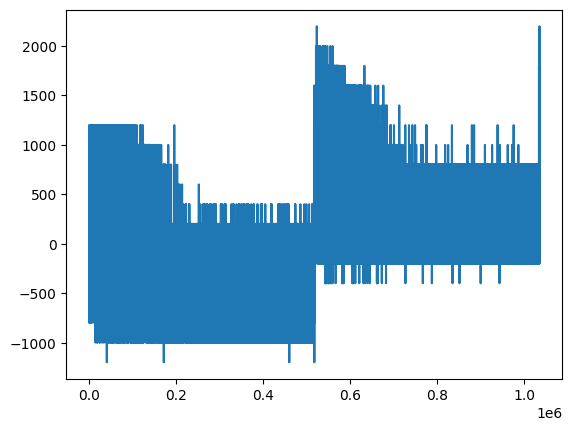

In [15]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [ ]:
# sns.pairplot(df.head(10000))

## X paramiter for feeding Model

In [18]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,6.187260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19998.21,20002.69,19995.19,19998.23,441.0,9.474930,1.894831e+05
1,0.973320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19997.00,19998.00,19997.00,19997.02,173.0,2.829590,5.658343e+04
2,17.762630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,19987.74,19998.62,19985.14,19987.76,642.0,25.911260,5.180279e+05
3,0.707620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,39858.03,39858.07,39853.57,39858.07,89.0,1.005430,4.007142e+04
4,3.036725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0001,49822.24,49860.68,49803.54,49822.29,238.0,7.058411,3.517801e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035982,35.556670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,20100.00,20111.00,20090.47,20099.98,1169.0,72.755640,1.462424e+06
1035983,0.109080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,40155.03,40165.00,40154.99,40154.99,64.0,0.414450,1.664380e+04
1035984,0.089730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,40089.32,40097.68,40089.28,40089.28,42.0,0.367120,1.471828e+04
1035985,0.921370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0001,30036.85,30036.85,30026.53,30036.82,94.0,1.743990,5.237727e+04


## Y paramiter for feedind Model

In [19]:
y = df['Sum']
y

0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1035982    500.0
1035983    500.0
1035984    400.0
1035985    500.0
1035986    600.0
Name: Sum, Length: 1035987, dtype: float64

## Model for AI Research

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
# model=RandomForestClassifier()
model

DecisionTreeClassifier()

## Fit X and y data to model

In [111]:
# model.fit(X, y)

## Calculating the Accuracy
### Normally I take very small data for that but in real application we have to take very big dataset

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions)
print(len(predictions))
print(y_test)
accuracy_score(y_test, predictions)

[ 200.  100.  100. ...    0. -400.  100.]
103599
620281    200.0
783382    100.0
878361    100.0
739824    100.0
823845    100.0
          ...  
109092      0.0
872860    200.0
180375      0.0
434655   -400.0
776557    100.0
Name: Sum, Length: 103599, dtype: float64


0.9611965366461066

## Export Train model

In [41]:
import joblib
model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor.joblib")

['btcbusd_trand_predictor.joblib']

## Directally Grab Fidable data from internet but it have to be superviged test data from database

## Make Prediction With Train Model

In [20]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
print(model.predict([df]))

[0.]


c:\users\zihad\pycharmprojects\tradingaidev\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [21]:
# print(df)

model = joblib.load("btcbusd_trand_predictor.joblib")
predictions = model.predict([df])
predictions

c:\users\zihad\pycharmprojects\tradingaidev\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

## All Coulms need for creat a Visual Representation

In [22]:
feature_name = list(X.columns)

## Export model in dot visual language
class_names=sorted(y.unique()),

In [ ]:
from sklearn import tree
model = DecisionTreeClassifier()
model.fit(X, y)
tree.export_graphviz(model, out_file='btc_busd_visual.dot',
                    feature_names=feature_name,
                     label='all',
                     rounded=True,
                     filled=True
                    )

## Use Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(256, input_shape=X_train.shape, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# model.fit(X_train, y_train, epochs=1000)